# Algorithm for Sigmoid Neuron using Gradient Descent

## Plotting Sigmoid function

In [21]:
import numpy as np
import matplotlib.pyplot as plt

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [22]:
def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(w*x + b)))

In [23]:
sigmoid(1, 0.5, 0)

0.6224593312018546

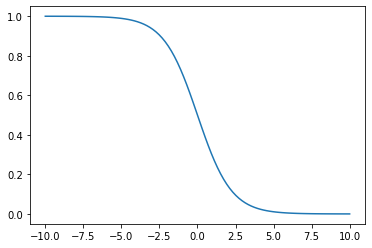

In [50]:
w = -0.9 #@param {type: "slider", min:-2, max:2}
b = 0 #@param {type: "slider", min:-2, max:2}
X = np.linspace(-10, 10, 100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

## Sigmoid with two parameters

$S{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}} $

In [51]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1 / (1 + np.exp(-(np.dot(w1, x1) + np.dot(w2, x2) + b)))

In [53]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

### Plot 3d Data in matplot

In [57]:
from mpl_toolkits import mplot3d
%matplotlib inline

In [58]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)
print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [141]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

Text(0.5, 0, 'y')

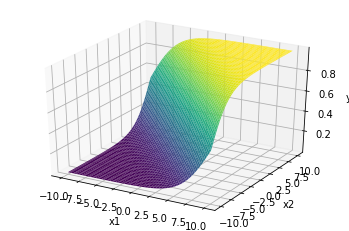

In [64]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


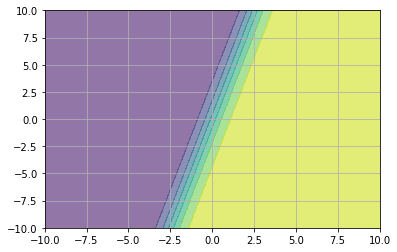

In [142]:
plt.contourf(XX1, XX2, Y, alpha=0.6)
plt.grid()
plt.show()

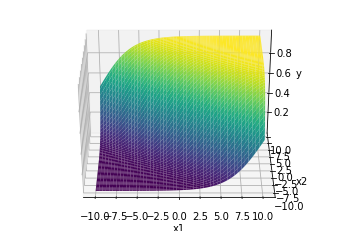

In [65]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)

In [66]:
w1 = 0.5
w2 = 2
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

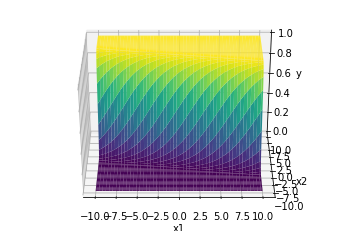

In [67]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)

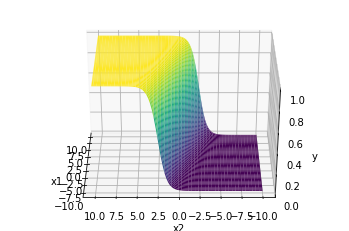

In [68]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 180)

## Compute loss for Given dataset

In [69]:
w_unknown = 0.5 
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

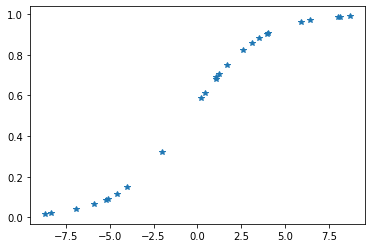

In [71]:
plt.plot(X, Y, '*')
plt.show()

In [103]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est)) ** 2
    return loss

In [127]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [128]:
Loss

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])
    

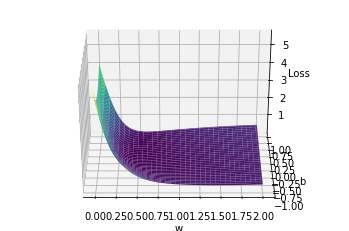

In [130]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');

ax.view_init(30, 270)

In [131]:
ij = np.argmin(Loss)
i = int(np.floor(ij / Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [132]:
print(i, j)

63 25


In [133]:
Loss[int(i), int(j)]

4.431331807192571e-05

In [134]:
print(WW[i, j], BB[i, j])

0.5 0.26


## Sigmoid Neuron Class

In [170]:
class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def fit(self, X, Y, epochs, learning_rate = 1, initilize=True): 
        
        # initialise w, b
        if initilize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        
        for i in range(epochs):
            dw, db = 0, 0
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db

## Fit for Toy data

In [216]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [217]:
sn = SigmoidNeuron()


In [218]:
X.shape

(6, 2)

In [219]:
print(sn.w, sn.b)

None None


In [220]:
def plot_sn(X, Y, sn, ax):
    
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    
    ax.contourf(XX1, XX2, YY, alpha=0.65)
    ax.grid()
    ax.scatter(X[:, 0], X[:, 1], c=Y)
    ax.plot()

[[-1.20440777  0.49327491]] [-0.00758003]
[[-0.81717646  0.49412996]] [-0.11724688]
[[-0.30239338  0.39708567]] [-0.15112453]
[[ 0.58958928 -0.17149332]] [-0.13835666]
[[ 0.82197355 -0.33308978]] [-0.19447521]
[[ 1.02944968 -0.2044097 ]] [-0.25084501]
[[ 1.04143021 -0.56768141]] [-0.32256606]
[[ 1.32667262 -0.14859638]] [-0.36924436]
[[ 1.26113579 -0.71047079]] [-0.45400764]
[[ 1.54185767 -0.26843883]] [-0.49976417]
[[ 1.48666071 -0.66667047]] [-0.57109591]
[[ 1.62658039 -0.45655018]] [-0.59981525]
[[ 1.63153592 -0.55893364]] [-0.62995549]
[[ 1.67334485 -0.54236491]] [-0.64954826]
[[ 1.70133215 -0.55680757]] [-0.66927987]
[[ 1.72952529 -0.56528492]] [-0.68750966]
[[ 1.75593111 -0.57391376]] [-0.7047193]
[[ 1.7809622  -0.58204667]] [-0.72097573]
[[ 1.80473787 -0.58977328]] [-0.73637409]
[[ 1.82737556 -0.59713074]] [-0.75099441]
[[ 1.84897691 -0.60415205]] [-0.76490653]
[[ 1.86963066 -0.61086604]] [-0.77817158]
[[ 1.88941476 -0.61729804]] [-0.79084342]
[[ 1.90839801 -0.62347039]] [-0.802

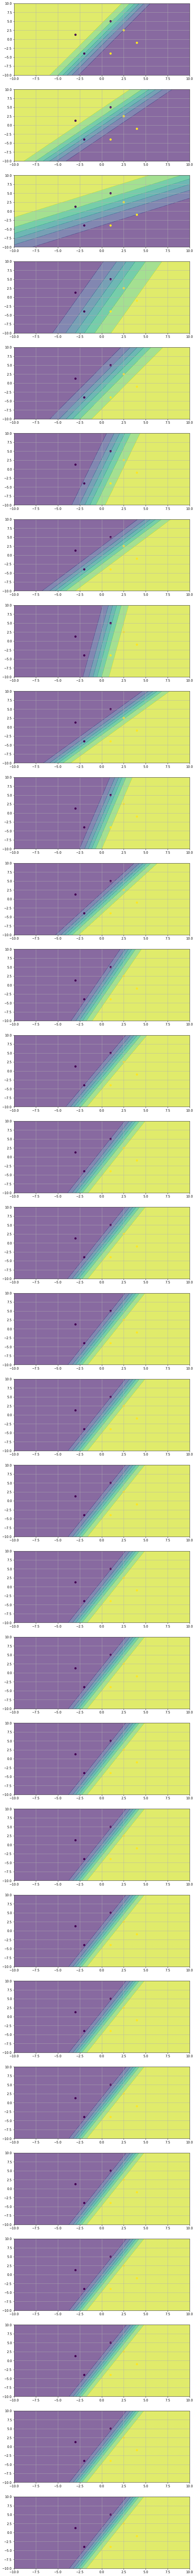

In [224]:

sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize = (10, N * 5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i + 1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.75, False)